# Table of content

1. Importing libraries and data and Tasks from Excercise 4.10

2. Addressing security implications

3. Addressing security implications

4. Creating an exclusion flag for low-activity customers

5. Creating profile variable based on age, income, department_id column and number of dependents


6.  visualizing to show the distribution of profile variable created from; age, income, department_id column and number of dependents

7.Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

8. Create data to compare customer profiles with regions and departments and identify a link between them.

9. visualizing compared customer profiles with regions and departments 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\tee3a\3D Objects\12-2022 Instacart Basket Analysis'

In [3]:
ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data for storing any manipulated data sets', 'ords_prods_custs_visualizations.pkl'))

In [4]:
ords_prods_custs_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   First Name              object  
 2   Surnam                  object  
 3   Gender                  object  
 4   STATE                   object  
 5   Age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  product_id              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  order_id                int64   
 16  eval_set                object  
 17  order_number            int64   
 18  orders_day_of_week      int64   
 19  order_hour_of_day       int64   
 20  days_since_prior_order  float64 
 21  add_to

In [5]:
# To create a crosstab between the “days_since_prior_order” column and the “order_number” column to establish the relationship and import to EXCEL

crosstab = pd.crosstab(ords_prods_custs_merge['days_since_prior_order'], ords_prods_custs_merge['order_number'], dropna = False)

In [6]:
# To copy the crosstab on clipboard for further copy on the excel

crosstab.to_clipboard()

In [7]:
crosstab_prices = pd.crosstab(ords_prods_custs_merge['prices'], ords_prods_custs_merge['loyalty_flag'], dropna = False)

In [8]:
crosstab_prices.to_clipboard()

# Task Part 1 #2.
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [9]:
ords_prods_custs_merge_security = ords_prods_custs_merge.drop(columns = ['First Name'] + ['Surnam'])

In [10]:
ords_prods_custs_merge_security.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   Gender                  object  
 2   STATE                   object  
 3   Age                     int64   
 4   date_joined             object  
 5   n_dependants            int64   
 6   fam_status              object  
 7   income                  int64   
 8   product_id              int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  order_id                int64   
 14  eval_set                object  
 15  order_number            int64   
 16  orders_day_of_week      int64   
 17  order_hour_of_day       int64   
 18  days_since_prior_order  float64 
 19  add_to_cart_order       int64   
 20  reordered               int64   
 21  _merge

# 3.
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# STATE

ords_prods_custs_merge_security['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [12]:
NERegion = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [13]:
MWRegion = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [14]:
SouthRegion = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
WestRegion = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 

In [16]:
ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['STATE'].isin (NERegion), 'Region'] = 'Northeast'

In [17]:
ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['STATE'].isin (MWRegion), 'Region'] = 'Northwest'

In [18]:
ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['STATE'].isin (SouthRegion), 'Region'] = 'South'

In [19]:
ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['STATE'].isin (WestRegion), 'Region'] = 'West'

In [20]:
ords_prods_custs_merge_security['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Northwest     7597325
Northeast     5722736
Name: Region, dtype: int64

#
Determine whether there’s a difference in spending habits between the different U.S. regions.

In [21]:
crosstab_region_spending = pd.crosstab(ords_prods_custs_merge_security['Region'], ords_prods_custs_merge_security['Spender_pattern'], dropna = False)

In [22]:
crosstab_region_spending.to_clipboard()

#
Overall, its noted that there are more lower spenders (total of 31,770,614) than high spenders (total of  634,245). The region that spends highest is the South, followed by West, next is Northwest and lastly by Northeast.

# 4.
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# using the max_order column

ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['max_order'] < 5, 'exclusion_flag'] = 'low_activity_customers'

In [24]:
ords_prods_custs_merge_security.loc[ords_prods_custs_merge_security['max_order'] >= 5, 'exclusion_flag'] = 'high_activity_customers'

In [25]:
# Check value counts of exclusion_flag

ords_prods_custs_merge_security['exclusion_flag'].value_counts(dropna = False)

high_activity_customers    30964564
low_activity_customers      1440295
Name: exclusion_flag, dtype: int64

In [26]:
# Dropping the low_activity_customers  

ords_prods_custs_merge_drop = ords_prods_custs_merge_security.drop(ords_prods_custs_merge_security[ords_prods_custs_merge_security.max_order < 5].index)

In [27]:
# Check value counts of exclusion_flag

ords_prods_custs_merge_drop['exclusion_flag'].value_counts(dropna = False)

high_activity_customers    30964564
Name: exclusion_flag, dtype: int64

In [28]:
# Exporting the sample

ords_prods_custs_merge_drop.to_pickle(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'ords_prods_custs_merge_drop.pkl'))

# 5.
 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
# Age

ords_prods_custs_merge_drop['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

# 
The average age is 49, the minimum age is 18, and the maximum age is 81. The age will be grouped as young adult-18 to 45years, middle adult- 45 to 65 years and old adult- 66 to 81 years

In [30]:
# Create age_flag
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['Age'] <= 45, 'Age_flag'] = 'Young_adult'

In [31]:
ords_prods_custs_merge_drop.loc[(ords_prods_custs_merge_drop['Age'] >= 46) & (ords_prods_custs_merge_drop['Age'] <= 65), 'Age_flag'] = 'Middle_adult'


In [32]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['Age'] >= 66, 'Age_flag'] = 'Old_adult'

In [33]:
# Check value counts of Age_flag
ords_prods_custs_merge_drop['Age_flag'].value_counts(dropna = False)

Young_adult     13567057
Middle_adult     9666673
Old_adult        7730834
Name: Age_flag, dtype: int64

In [34]:
ords_prods_custs_merge_drop.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,Ave_price,Spender_pattern,median_regularity,user_regularity,Region,exclusion_flag,Age_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult


In [35]:
# income

ords_prods_custs_merge_drop['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#
The average income is 99,700, the minimum income is 25,900, and the maximum income is  593,900. The income will be grouped as low income-25,900  to 50,000, middle income- 50,001 to 100,000 and high income- above 100,001 

In [36]:
# Create age_flag

ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['income'] <= 50000, 'Income_flag'] = 'Low income'

In [37]:
ords_prods_custs_merge_drop.loc[(ords_prods_custs_merge_drop['income'] >= 50001 ) & (ords_prods_custs_merge_drop['income'] <= 100000 ), 'Income_flag'] = 'Middle income'

In [38]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['income'] >= 100001 , 'Income_flag'] = 'High income'

In [39]:
# Check value counts of Income_flag
ords_prods_custs_merge_drop['Income_flag'].value_counts(dropna = False)

High income      14207028
Middle income    13394982
Low income        3362554
Name: Income_flag, dtype: int64

In [40]:
ords_prods_custs_merge_drop.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,max_order,loyalty_flag,Ave_price,Spender_pattern,median_regularity,user_regularity,Region,exclusion_flag,Age_flag,Income_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income


In [41]:
# number of dependents

ords_prods_custs_merge_drop['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

# 
The number of dependants are from 0-3. The n_dependants will be grouped as single-0  to , family with child- 1,  family with children - 2 to 3.

In [42]:
# Create age_flag
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['n_dependants'] <= 0, 'Familystatus_flag'] = 'Single'

In [43]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['n_dependants'] >= 1 , 'Familystatus_flag'] = 'Family with dependant '


In [44]:
# Check value counts of Familystatus_flag
ords_prods_custs_merge_drop['Familystatus_flag'].value_counts(dropna = False)

Family with dependant     23224883
Single                     7739681
Name: Familystatus_flag, dtype: int64

In [45]:
ords_prods_custs_merge_drop.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,loyalty_flag,Ave_price,Spender_pattern,median_regularity,user_regularity,Region,exclusion_flag,Age_flag,Income_flag,Familystatus_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income,Family with dependant
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income,Family with dependant
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income,Family with dependant
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income,Family with dependant
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low spender,19.0,Regular customer,Northwest,high_activity_customers,Middle_adult,High income,Family with dependant


In [46]:
# department_id

ords_prods_custs_merge_drop['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [47]:

df_dep_t = pd.read_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'departments_wrangled.csv'))

In [48]:
df_dep_t

,Unnamed: 0,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [49]:
# creating a new header
new_header = df_dep_t.iloc[0]

In [50]:
new_header

Unnamed: 0    department_id
0                department
Name: 0, dtype: object

In [51]:
# creating a new dataframe 
df_dep_t_new = df_dep_t[1:]

In [52]:
df_dep_t_new

,Unnamed: 0,0
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [53]:
df_dep_t_new.columns = new_header

In [54]:
df_dep_t_new.columns

Index(['department_id', 'department'], dtype='object', name=0)

In [55]:
department_id = df_dep_t_new

In [56]:
df_dep_t_new

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [57]:
ords_prods_custs_merge_drop['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [58]:
df_dep_t_new.to_pickle(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'df_dep_t_new.pkl'))

In [59]:
department_id = 'department'

#
The department_id has been profiled already

# 6.
Create an appropriate visualization to show the distribution of profiles

In [60]:
# reducing your samples to only 'Age_flag','Income_flag','department_id','Familystatus_flag'

ords_prods_custs_merge_profile = ords_prods_custs_merge_drop[['Age_flag','Income_flag','department_id','Familystatus_flag']]

<AxesSubplot:>

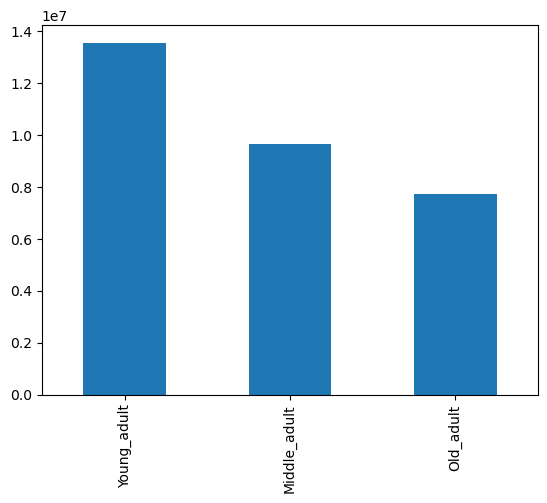

In [61]:
# Create bar chart for Age_flag

ords_prods_custs_merge_profile['Age_flag'].value_counts().plot.bar()

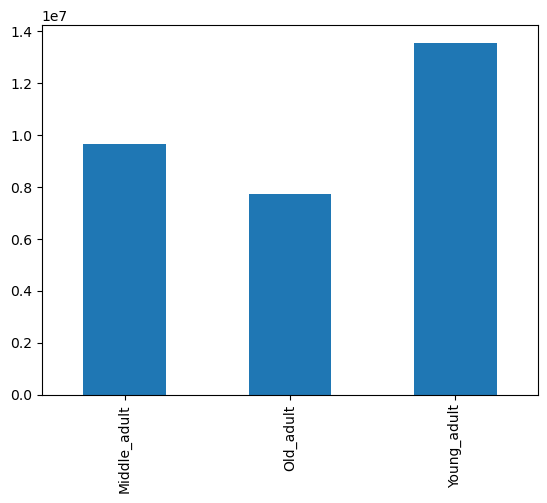

In [62]:
# To save the bar chart for Age_flag
bar_Age_flag = ords_prods_custs_merge_profile['Age_flag'].value_counts().sort_index().plot.bar()

In [63]:
# To export bar_Age_flag of Jupyter in the form of an image file

bar_Age_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Age_flag.png'))

<AxesSubplot:>

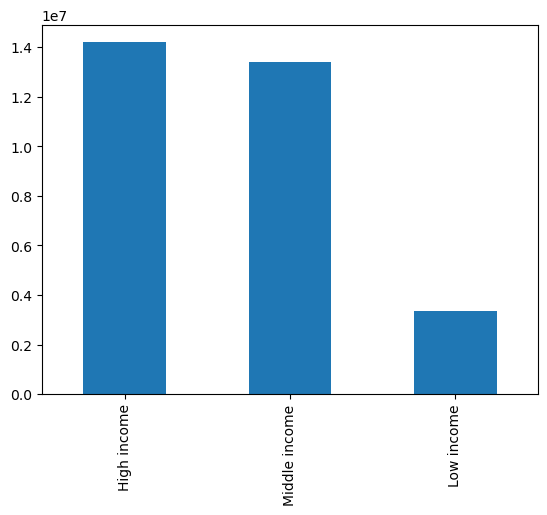

In [64]:
# Create bar chart for Income_flag

ords_prods_custs_merge_profile['Income_flag'].value_counts().plot.bar()

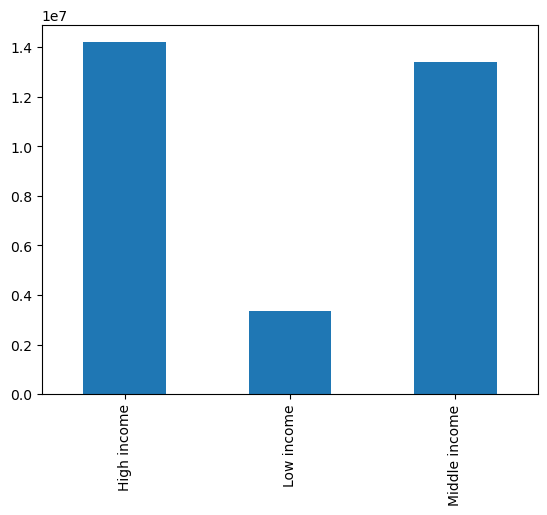

In [65]:
# To save the bar chart for Income_flag

bar_Income_flag = ords_prods_custs_merge_profile['Income_flag'].value_counts().sort_index().plot.bar()

In [66]:
# To export bar_Income_flag of Jupyter in the form of an image file

bar_Income_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Income_flag.png'))

<AxesSubplot:>

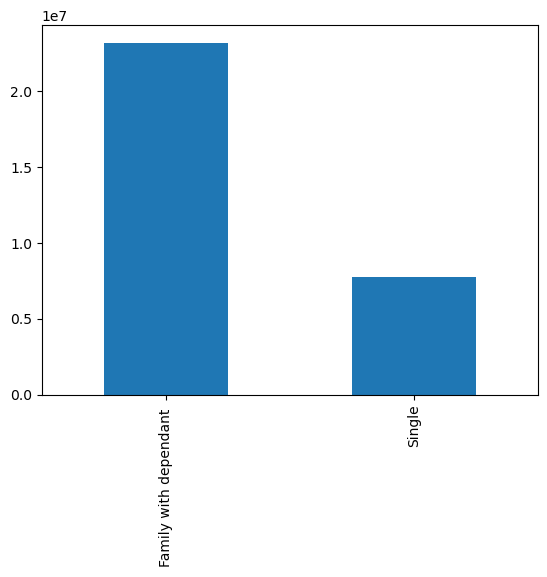

In [67]:
# Create bar chart for Familystatus_flag

ords_prods_custs_merge_profile['Familystatus_flag'].value_counts().plot.bar()

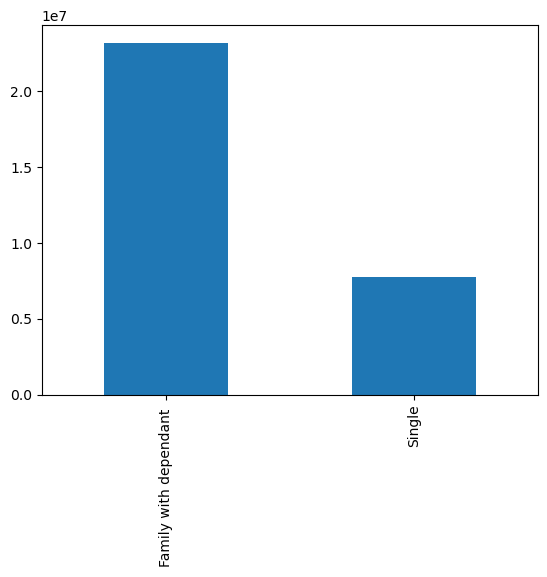

In [68]:
# To save the bar chart for Familystatus_flag

bar_Familystatus_flag = ords_prods_custs_merge_profile['Familystatus_flag'].value_counts().sort_index().plot.bar()

In [69]:
# To export bar_Familystatus_flag of Jupyter in the form of an image file

bar_Familystatus_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Familystatus_flag.png'))

<AxesSubplot:>

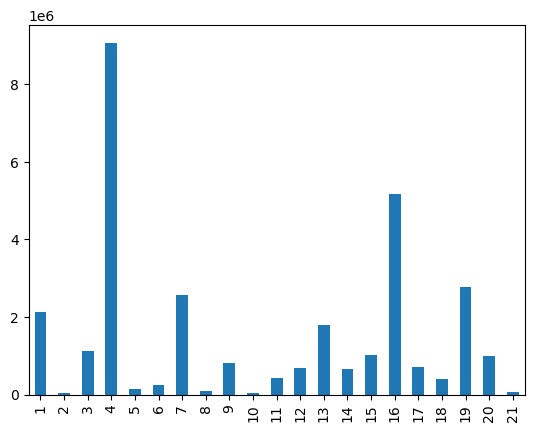

In [70]:
# Create bar chart for department_id_flag

ords_prods_custs_merge_profile['department_id'].value_counts().sort_index().plot.bar()

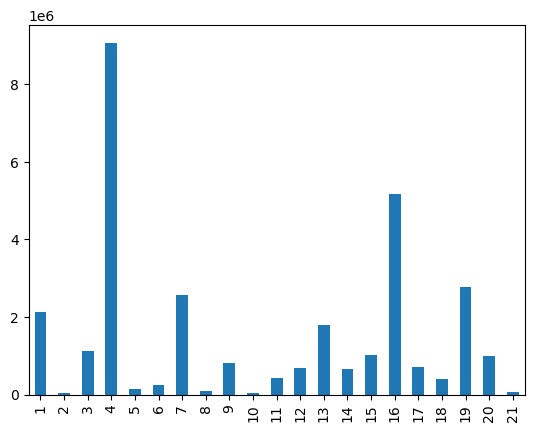

In [71]:
# To save the bar chart for department_id_flag

bar_department_id_flag = ords_prods_custs_merge_profile['department_id'].value_counts().sort_index().plot.bar()

In [72]:
# To export bar_department_id_flag of Jupyter in the form of an image file

bar_department_id_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_id_flag.png'))

# 7.
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [73]:
# create days column with name for customer-profile

ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 0, 'Day_of_week'] = 'Saturday'

In [74]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 1, 'Day_of_week'] = 'Sunday'

In [75]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 2, 'Day_of_week'] = 'Monday'

In [76]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 3, 'Day_of_week'] = 'Tuesday'

In [77]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 4, 'Day_of_week'] = 'Wednesday'

In [78]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 5, 'Day_of_week'] = 'Thursday'

In [79]:
ords_prods_custs_merge_drop.loc[ords_prods_custs_merge_drop['orders_day_of_week'] == 6, 'Day_of_week'] = 'Friday'

In [80]:
#  Check value counts of Day_of_week

ords_prods_custs_merge_drop['Day_of_week'].value_counts(dropna = False)

Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: Day_of_week, dtype: int64

#
Saturday has the highest orders for the week

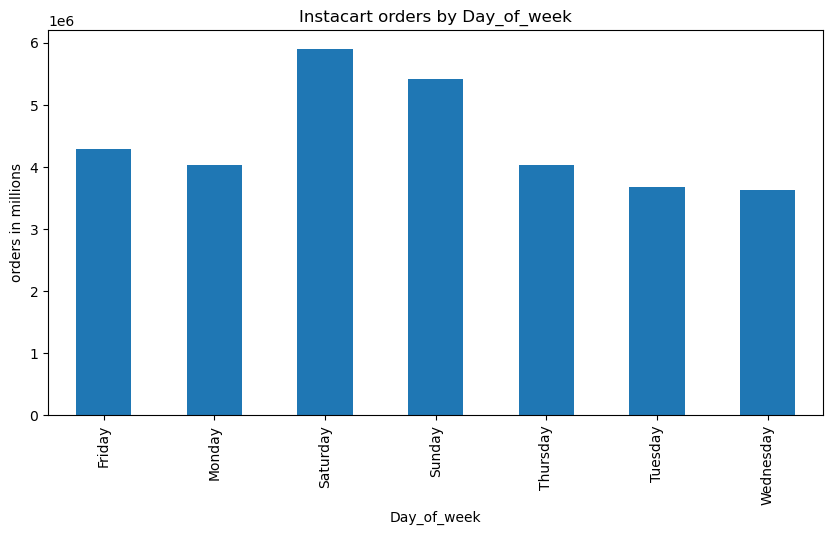

In [81]:
Create a bar chart

bar_Day_of_week = ords_prods_custs_merge_drop['Day_of_week'].value_counts().sort_index().plot.bar(figsize = (10,5)) ,plt.xlabel("Day_of_week") ,plt.ylabel("orders in millions") , plt.title ("Instacart orders by Day_of_week")
     

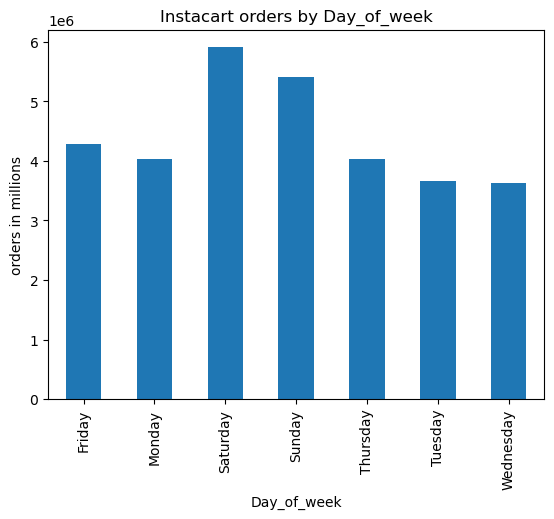

In [82]:
# To save the bar chart for Day_of_week

bar_Day_of_week = ords_prods_custs_merge_drop['Day_of_week'].value_counts().sort_index().plot.bar() ,plt.xlabel("Day_of_week") ,plt.ylabel("orders in millions") , plt.title ("Instacart orders by Day_of_week")

In [83]:
# To export bar_Day_of_week of Jupyter in the form of an image file



# USAGE FREQUENCY

In [84]:
# Usage frequency aggregation of loyalty_flag profile 

ords_prods_custs_merge_drop.groupby('loyalty_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.936463  0.0  30.0
New customer                  15.273428  0.0  30.0
Regular customer              11.602086  0.0  30.0

In [85]:
# Usage frequency aggregation of loyalty_flag profile 

ords_prods_custs_merge_drop.groupby('loyalty_flag').agg({'add_to_cart_order':['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
loyalty_flag                               
Loyal customer            8.284024   1  137
New customer              8.311567   1  102
Regular customer          8.429793   1  145

In [86]:
# Usage frequency aggregation of Age profile 

ords_prods_custs_merge_drop.groupby('Age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Age_flag                                      
Middle_adult              10.298109  0.0  30.0
Old_adult                 10.274889  0.0  30.0
Young_adult               10.292714  0.0  30.0

In [87]:
# Usage frequency aggregation of Income profile 

ords_prods_custs_merge_drop.groupby('Income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
Income_flag                                    
High income                10.255614  0.0  30.0
Low income                 10.593140  0.0  30.0
Middle income              10.250253  0.0  30.0

In [88]:
# Usage frequency aggregation of Familystatus profile 

ords_prods_custs_merge_drop.groupby('Familystatus_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                         mean  min   max
Familystatus_flag                                       
Family with dependant               10.295548  0.0  30.0
Single                              10.273144  0.0  30.0

In [89]:
# Usage frequency aggregation of Gender status profile

ords_prods_custs_merge_drop.groupby('Gender').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              10.275299  0.0  30.0
Male                10.304401  0.0  30.0

In [90]:
# Usage frequency aggregation of Region status profile

ords_prods_custs_merge_drop.groupby('Region').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
Region                                     
Northeast              10.258213  0.0  30.0
Northwest              10.363238  0.0  30.0
South                  10.292664  0.0  30.0
West                   10.241156  0.0  30.0

# EXPENDITURE

In [91]:
# Expenditure frequency aggregation of Age profile  

ords_prods_custs_merge_drop.groupby('Age_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                  mean  min   max
Age_flag                         
Middle_adult  7.791559  1.0  25.0
Old_adult     7.794342  1.0  25.0
Young_adult   7.787762  1.0  25.0

In [92]:
# Expenditure frequency aggregation of Income profile 

ords_prods_custs_merge_drop.groupby('Income_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                   mean  min   max
Income_flag                       
High income    7.953438  1.0  25.0
Low income     6.707347  1.0  25.0
Middle income  7.889856  1.0  25.0

In [93]:
# Expenditure frequency aggregation of Familystatus profile 

ords_prods_custs_merge_drop.groupby('Familystatus_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                            mean  min   max
Familystatus_flag                          
Family with dependant   7.790937  1.0  25.0
Single                  7.789550  1.0  25.0

In [94]:
# Expenditure frequency aggregation of Gender status  profile 

ords_prods_custs_merge_drop.groupby('Gender').agg({'prices':['mean', 'min', 'max']})

prices           
            mean  min   max
Gender                     
Female  7.788193  1.0  25.0
Male    7.792956  1.0  25.0

In [95]:
# Expenditure frequency aggregation of Region status  profile 

ords_prods_custs_merge_drop.groupby('Region').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Northeast  7.781441  1.0  25.0
Northwest  7.792318  1.0  25.0
South      7.794439  1.0  25.0
West       7.790308  1.0  25.0

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [96]:
# To create a crosstab between the “Gender” column and the “Region” column to establish the relationship and import to EXCEL

crosstab_gender_region = pd.crosstab(ords_prods_custs_merge_drop['Gender'], ords_prods_custs_merge_drop['Region'], dropna = False)

In [97]:
# To copy the crosstab on clipboard for further copy on the excel

crosstab_gender_region.to_clipboard()

In [98]:
# To create a crosstab between the “Income_flag” column and the “department_id” column to establish the relationship and import to EXCEL

crosstab_income_dept = pd.crosstab(ords_prods_custs_merge_drop['Income_flag'], ords_prods_custs_merge_drop['department_id'], dropna = False)

In [99]:
# To copy the crosstab on clipboard for further copy on the excel

crosstab_income_dept .to_clipboard()

In [100]:
# To create a crosstab between the “Income_flag'” column and the “Region” column to establish the relationship and import to EXCEL

crosstab_income_region = pd.crosstab(ords_prods_custs_merge_drop['Income_flag'], ords_prods_custs_merge_drop['Region'], dropna = False)

In [101]:
crosstab_income_region.to_clipboard()

In [102]:
# To create a crosstab between the “Familystatus_flag” column and the “department_id” column to establish the relationship and import to EXCEL

crosstab_family_dept = pd.crosstab(ords_prods_custs_merge_drop['Familystatus_flag'], ords_prods_custs_merge_drop['department_id'], dropna = False)

In [103]:
crosstab_family_dept.to_clipboard() 

In [104]:
# To create a crosstab between the “Age_flag” column and the “department_id” column to establish the relationship and import to EXCEL

crosstab_age_dept = pd.crosstab(ords_prods_custs_merge_drop['Age_flag'], ords_prods_custs_merge_drop['department_id'], dropna = False)

In [105]:
crosstab_age_dept.to_clipboard()

In [106]:
# To create a crosstab between the “Familystatus_flag” column and the “Region” column to establish the relationship and import to EXCEL

crosstab_family_region = pd.crosstab(ords_prods_custs_merge_drop['Familystatus_flag'], ords_prods_custs_merge_drop['Region'], dropna = False)

In [107]:
crosstab_family_region.to_clipboard()

In [116]:
# To create a crosstab between the “Familystatus_flag” column and the “Region” column to establish the relationship and import to EXCEL

crosstab_department_prices = pd.crosstab(ords_prods_custs_merge_drop['department_id'], ords_prods_custs_merge_drop['prices'], dropna = False)

In [117]:
crosstab_department_prices.to_clipboard()

# 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [134]:
# reducing your samples to only 'Gender','Region','Income_flag','department_id','Familystatus_flag', Age_flag

ords_prods_custs_merge_profile = ords_prods_custs_merge_drop[['add_to_cart_order','prices','Gender','Region','Age_flag','Income_flag','department_id','Familystatus_flag']]

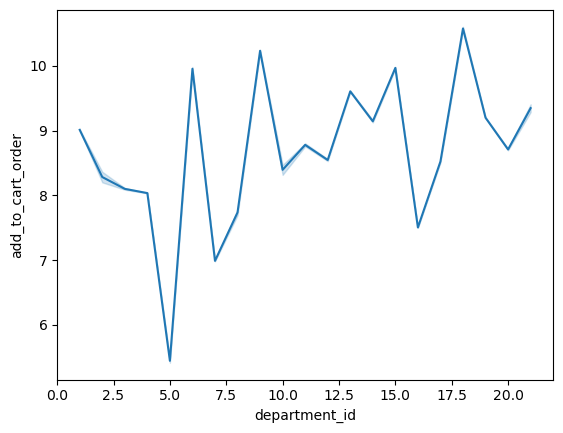

In [135]:
# To create a line chart of department_id and add_to_cart_order

line_department_add_to_cart_order = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'department_id',y = 'add_to_cart_order')

In [136]:
# To export line chart of department_id and prices of Jupyter in the form of an image file

line_department_add_to_cart_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_department_add_to_cart_order.png'))

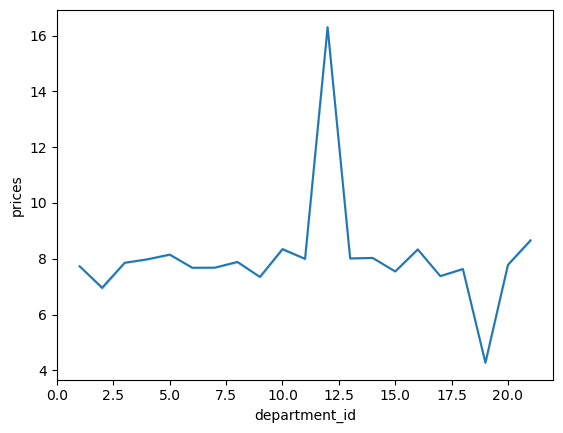

In [119]:
# To create a line chart of department_id and prices

line_department_prices = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'department_id',y = 'prices')

In [120]:
# To export line chart of department_id and prices of Jupyter in the form of an image file

line_department_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_department_prices.png'))

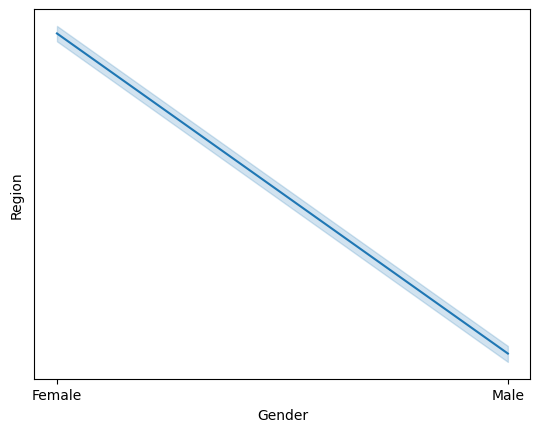

In [121]:
# To create a line chart of Gender and Region

line_Gender_Region = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'Gender',y = 'Region')

In [122]:
# To export line chart of Gender and Region of Jupyter in the form of an image file

line_Gender_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Gender_Region.png'))

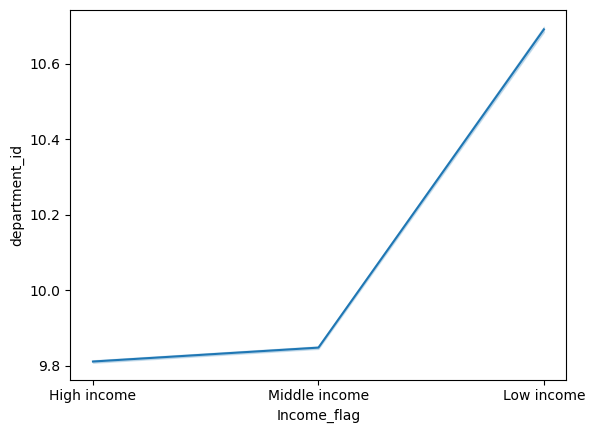

In [123]:
# To create a line chart of Income_flag and department_id

line_Income_department = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'Income_flag',y = 'department_id')

In [124]:
# To export line chart of Income_flag and department_id of Jupyter in the form of an image file

line_Income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Income_department.png'))

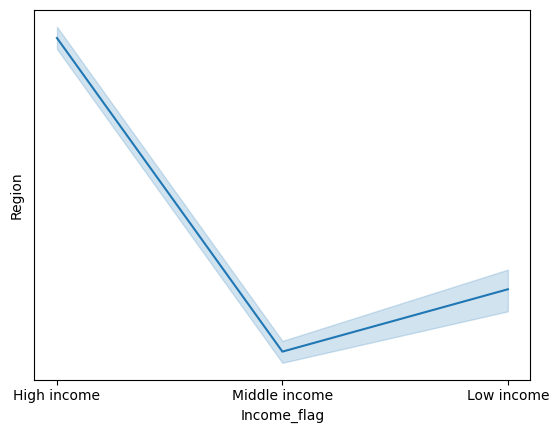

In [125]:
# To create a line chart of Income_flag and Region

line_Income_Region = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'Income_flag',y = 'Region')

In [126]:
# To export line chart of Income_flag and Region of Jupyter in the form of an image file

line_Income_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Income_Region.png'))

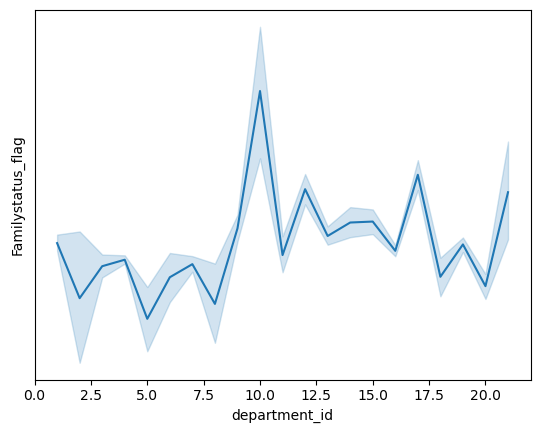

In [127]:
# To create a line chart of department_id and Familystatus_flag

line_department_Familystatus = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'department_id',y = 'Familystatus_flag')

In [128]:
# To export line chart of department_id and Familystatus_flag of Jupyter in the form of an image file

line_department_Familystatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_department_Familystatus.png'))

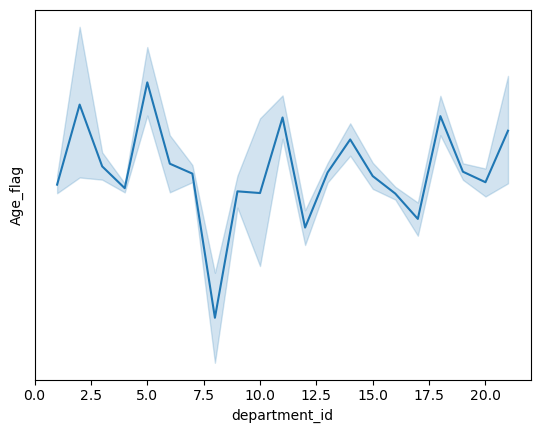

In [129]:
# To create a line chart of department_id and Age_flag

line_department_Age = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'department_id',y = 'Age_flag')

In [130]:
# To export line chart of department_id and Age_flag of Jupyter in the form of an image file

line_department_Age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_department_Age.png'))

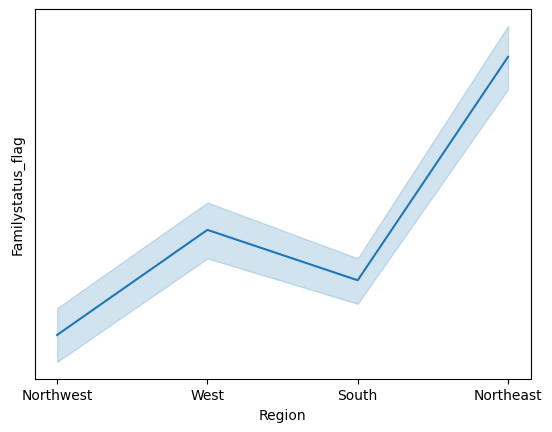

In [131]:
# To create a line chart of Region and Familystatus_flag

line_Region_Familystatus = sns.lineplot(data = ords_prods_custs_merge_profile, x = 'Region',y = 'Familystatus_flag')

In [132]:
# To export line chart of Region and Familystatus_flag of Jupyter in the form of an image file

line_Region_Familystatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Region_Familystatus.png'))

# Export data

In [137]:
ords_prods_custs_merge_drop.to_pickle(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'ords_prods_custs_merge_drop_visualizations.pkl'))